In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,fbeta_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from datetime import datetime

In [3]:
df=pd.read_csv("Final_Fully_Filled_Dataset.csv",encoding='unicode_escape')

In [4]:
df

,Girl_age,Relationship_Status,Past_RelationShips,Body_Count,Easy_Moveon,Looks,Response,Introvert/Extrovert,Superiority_Complex,Mistake_Acceptance,Open_to_Phone,Pays_Bill,High_Maintenance,Male_Bestfriends,Time_with_male_friends(In min),Feminist,GenZ_prespective,Red_Flag?
0,12,Yes,0,0,Mid,0,Normal,I,Yes,No,Yes,No,No,0,0,Yes,No,White
1,12,Yes,1,0,Mid,4,Normal,E,No,No,No,No,No,0,0,No,No,White
2,12,Yes,0,0,Mid,9,Normal,I,No,No,Yes,No,No,0,0,Yes,No,Green
3,12,No,1,0,Mid,2,Interested,E,No,No,No,No,Yes,0,0,No,Yes,Red
4,12,Yes,0,0,Mid,3,Normal,I,No,Yes,No,No,No,0,0,Yes,No,Green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,30,Yes,21,1,Mid,7,Not interested,I,No,Yes,No,No,No,2,40,Yes,No,Green
584,30,No,0,0,Low,9,Normal,E,Yes,No,No,No,No,2,40,Yes,No,Green
585,30,No,2,0,Low,10,Normal,E,No,Yes,No,No,No,4,80,Yes,No,Green
586,30,Yes,0,1,Mid,10,Not interested,E,No,No,No,Yes,No,1,20,Yes,Yes,White


In [5]:
df.isnull().sum()

Girl_age                          0
Relationship_Status               0
Past_RelationShips                0
Body_Count                        0
Easy_Moveon                       0
Looks                             0
Response                          0
Introvert/Extrovert               0
Superiority_Complex               0
Mistake_Acceptance                0
Open_to_Phone                     0
Pays_Bill                         0
High_Maintenance                  0
Male_Bestfriends                  0
Time_with_male_friends(In min)    0
Feminist                          0
GenZ_prespective                  0
Red_Flag?                         0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Girl_age                        588 non-null    int64 
 1   Relationship_Status             588 non-null    object
 2   Past_RelationShips              588 non-null    int64 
 3   Body_Count                      588 non-null    int64 
 4   Easy_Moveon                     588 non-null    object
 5   Looks                           588 non-null    int64 
 6   Response                        588 non-null    object
 7   Introvert/Extrovert             588 non-null    object
 8   Superiority_Complex             588 non-null    object
 9   Mistake_Acceptance              588 non-null    object
 10  Open_to_Phone                   588 non-null    object
 11  Pays_Bill                       588 non-null    object
 12  High_Maintenance                588 non-null    ob

In [19]:
import pandas as pd

def value_counts_for_all_columns(df):
    for column in df.select_dtypes(include=['object', 'category']).columns:
        print(f"Value counts for '{column}':")
        print(df[column].value_counts(), "\n")


value_counts_for_all_columns(df)


Value counts for 'Relationship_Status':
Relationship_Status
Yes    294
No     294
Name: count, dtype: int64 

Value counts for 'Easy_Moveon':
Easy_Moveon
Mid     403
Low      97
High     88
Name: count, dtype: int64 

Value counts for 'Response':
Response
normal            371
not interested    147
interested         70
Name: count, dtype: int64 

Value counts for 'Introvert/Extrovert':
Introvert/Extrovert
E    297
I    291
Name: count, dtype: int64 

Value counts for 'Superiority_Complex':
Superiority_Complex
no     468
yes    120
Name: count, dtype: int64 

Value counts for 'Mistake_Acceptance':
Mistake_Acceptance
No     458
Yes    130
Name: count, dtype: int64 

Value counts for 'Open_to_Phone':
Open_to_Phone
Yes    357
No     231
Name: count, dtype: int64 

Value counts for 'Pays_Bill':
Pays_Bill
No     468
Yes    120
Name: count, dtype: int64 

Value counts for 'High_Maintenance':
High_Maintenance
No     441
Yes    147
Name: count, dtype: int64 

Value counts for 'Feminist':
Femin

In [13]:
df['Red_Flag?'] = df['Red_Flag?'].str.strip().str.lower()  # Removes spaces and converts to lowercase
df['Red_Flag?'] = df['Red_Flag?'].replace({'White':'White'}) 

In [15]:
df['Feminist'] = df['Feminist'].str.strip().str.lower()  # Removes spaces and converts to lowercase
df['Feminist'] = df['Feminist'].replace({'Yes':'YEs'}) 

In [17]:
df['Response'] = df['Response'].str.strip().str.lower()  # Removes spaces and converts to lowercase
df['Response'] = df['Response'].replace({'Not Interested':'Not interested'}) 

In [18]:
df['Superiority_Complex'] = df['Superiority_Complex'].str.strip().str.lower()  # Removes spaces and converts to lowercase
df['Superiority_Complex'] = df['Superiority_Complex'].replace({'No':'No'}) 

In [20]:
import pandas as pd

def value_counts_for_all_columns(df):
    for column in df.select_dtypes(include=['object', 'category']).columns:
        print(f"Value counts for '{column}':")
        print(df[column].value_counts(), "\n")


value_counts_for_all_columns(df)


Value counts for 'Relationship_Status':
Relationship_Status
Yes    294
No     294
Name: count, dtype: int64 

Value counts for 'Easy_Moveon':
Easy_Moveon
Mid     403
Low      97
High     88
Name: count, dtype: int64 

Value counts for 'Response':
Response
normal            371
not interested    147
interested         70
Name: count, dtype: int64 

Value counts for 'Introvert/Extrovert':
Introvert/Extrovert
E    297
I    291
Name: count, dtype: int64 

Value counts for 'Superiority_Complex':
Superiority_Complex
no     468
yes    120
Name: count, dtype: int64 

Value counts for 'Mistake_Acceptance':
Mistake_Acceptance
No     458
Yes    130
Name: count, dtype: int64 

Value counts for 'Open_to_Phone':
Open_to_Phone
Yes    357
No     231
Name: count, dtype: int64 

Value counts for 'Pays_Bill':
Pays_Bill
No     468
Yes    120
Name: count, dtype: int64 

Value counts for 'High_Maintenance':
High_Maintenance
No     441
Yes    147
Name: count, dtype: int64 

Value counts for 'Feminist':
Femin

<Axes: xlabel='Girl_age', ylabel='Body_Count'>

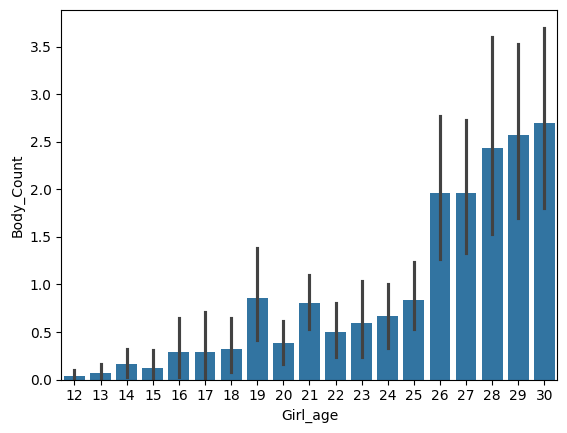

In [21]:
sns.barplot(x="Girl_age",y="Body_Count",data=df)

<Axes: xlabel='Red_Flag?', ylabel='Time_with_male_friends(In min)'>

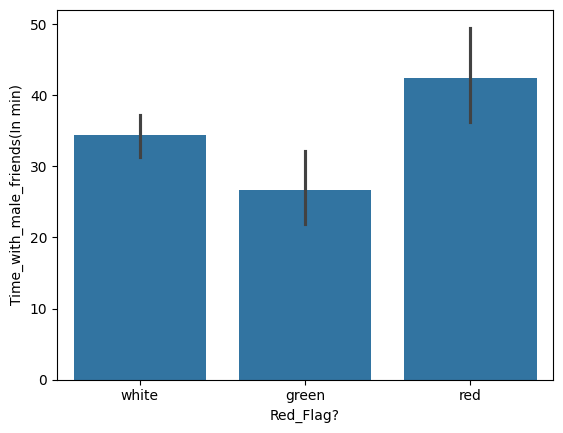

In [30]:
sns.barplot(x="Red_Flag?",y="Time_with_male_friends(In min)",data=df)

In [33]:
df_counts = df.groupby(['Girl_age', 'Red_Flag?']).size().reset_index(name='count')

<Axes: xlabel='Girl_age', ylabel='count'>

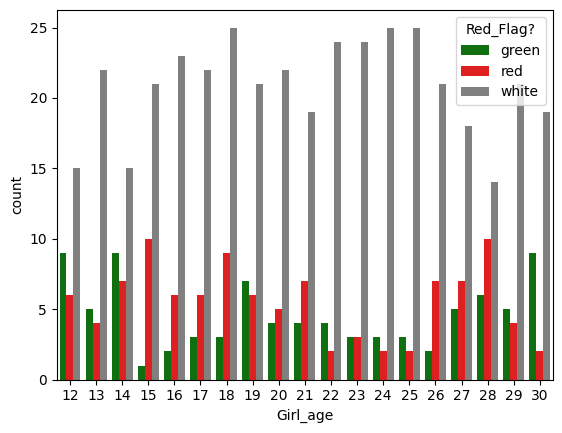

In [39]:
custom_colors = {"white": "grey", "red": "red", "green": "green"}
sns.barplot(x="Girl_age",y="count",data=df_counts,hue='Red_Flag?',palette=custom_colors)

In [40]:

x=df.drop(['Red_Flag?'],axis=1)
y=df['Red_Flag?']

In [41]:
x.head()

,Girl_age,Relationship_Status,Past_RelationShips,Body_Count,Easy_Moveon,Looks,Response,Introvert/Extrovert,Superiority_Complex,Mistake_Acceptance,Open_to_Phone,Pays_Bill,High_Maintenance,Male_Bestfriends,Time_with_male_friends(In min),Feminist,GenZ_prespective
0,12,Yes,0,0,Mid,0,normal,I,yes,No,Yes,No,No,0,0,yes,No
1,12,Yes,1,0,Mid,4,normal,E,no,No,No,No,No,0,0,no,No
2,12,Yes,0,0,Mid,9,normal,I,no,No,Yes,No,No,0,0,yes,No
3,12,No,1,0,Mid,2,interested,E,no,No,No,No,Yes,0,0,no,Yes
4,12,Yes,0,0,Mid,3,normal,I,no,Yes,No,No,No,0,0,yes,No


In [42]:
y.head()

0    white
1    white
2    green
3      red
4    green
Name: Red_Flag?, dtype: object

In [49]:
num_features=x.select_dtypes(exclude="object").columns
non_num_features=x.select_dtypes(include="object").columns
non_num_features

Index(['Relationship_Status', 'Easy_Moveon', 'Response', 'Introvert/Extrovert',
       'Superiority_Complex', 'Mistake_Acceptance', 'Open_to_Phone',
       'Pays_Bill', 'High_Maintenance', 'Feminist', 'GenZ_prespective'],
      dtype='object')

In [44]:
Standard=StandardScaler()
onehot=OneHotEncoder(handle_unknown='ignore')
preprocessor=ColumnTransformer([("OneHotEncoder",onehot,non_num_features),
                                ("StandardScaler",Standard,num_features)])

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42, stratify=y)
x_train.shape, x_test.shape

((393, 17), (195, 17))

In [46]:
x_train=preprocessor.fit_transform(x_train)
x_test=preprocessor.transform(x_test)

In [47]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = encoder.transform(y_test.values.reshape(-1, 1))

In [48]:
y_train = np.argmax(y_train, axis=1)  # Convert one-hot to label indices
y_test = np.argmax(y_test, axis=1)

In [ ]:
print(type(y_train))
print(type(y_test))
print(y_train.shape)
print( y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[2 1 2 2 0]
[2 0 2 2 2]
(393,)
(195,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier